In [ ]:
#Write a Python program that performs social network analysis on any social network dataset.
#Your program should utilize the NetworkX library to analyze the network properties and provide insights
#about the network structure.

In [ ]:
!pip install networkx

In [ ]:
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline

In [ ]:
#Read nodes and edges datasets
nodes = pd.read_csv('InputFileNodes.csv')
edges = pd.read_csv('InputFileEdges.csv')

In [ ]:
nodes.head()

,id,media,media.type,type.label,audience.size
0,s01,NY Times,1,Newspaper,20
1,s02,Washington Post,1,Newspaper,25
2,s03,Wall Street Journal,1,Newspaper,30
3,s04,USA Today,1,Newspaper,32
4,s05,LA Times,1,Newspaper,20


In [ ]:
edges.head()

,from,to,weight,type
0,s01,s02,10,hyperlink
1,s01,s02,12,hyperlink
2,s01,s03,22,hyperlink
3,s01,s04,21,hyperlink
4,s04,s11,22,mention


In [ ]:
#Create undirected graph using edgelist
G = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True)

In [ ]:
#Create directed graph using edgelist
G_directed = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.DiGraph())

In [ ]:
#network info
nx.info(G)

/var/folders/k_/4w83j7ts3356034lr9_rdrd80000gn/T/ipykernel_1604/2195453032.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 17 nodes and 38 edges'

In [ ]:
#network info
nx.info(G_directed )

/var/folders/k_/4w83j7ts3356034lr9_rdrd80000gn/T/ipykernel_1604/2689333472.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_directed )


'DiGraph with 17 nodes and 48 edges'

In [ ]:
#Check nodes
G.nodes()

NodeView(('s01', 's02', 's03', 's04', 's11', 's05', 's15', 's06', 's17', 's08', 's09', 's16', 's10', 's07', 's12', 's13', 's14'))

In [ ]:
#Check nodes
G.edges()

EdgeView([('s01', 's02'), ('s01', 's03'), ('s01', 's04'), ('s01', 's15'), ('s01', 's05'), ('s02', 's05'), ('s02', 's03'), ('s02', 's10'), ('s02', 's09'), ('s03', 's04'), ('s03', 's12'), ('s03', 's10'), ('s03', 's11'), ('s03', 's08'), ('s03', 's05'), ('s03', 's07'), ('s04', 's11'), ('s04', 's06'), ('s04', 's12'), ('s04', 's17'), ('s04', 's15'), ('s11', 's14'), ('s05', 's15'), ('s05', 's09'), ('s15', 's06'), ('s06', 's17'), ('s06', 's16'), ('s06', 's12'), ('s17', 's16'), ('s17', 's13'), ('s08', 's09'), ('s08', 's07'), ('s09', 's10'), ('s10', 's07'), ('s07', 's14'), ('s12', 's13'), ('s12', 's14'), ('s13', 's14')])

In [ ]:
G.edges.data()

EdgeDataView([('s01', 's02', {'weight': 23, 'type': 'hyperlink'}), ('s01', 's03', {'weight': 21, 'type': 'hyperlink'}), ('s01', 's04', {'weight': 21, 'type': 'hyperlink'}), ('s01', 's15', {'weight': 11, 'type': 'hyperlink'}), ('s01', 's05', {'weight': 1, 'type': 'mention'}), ('s02', 's05', {'weight': 21, 'type': 'hyperlink'}), ('s02', 's03', {'weight': 21, 'type': 'hyperlink'}), ('s02', 's10', {'weight': 5, 'type': 'hyperlink'}), ('s02', 's09', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's04', {'weight': 23, 'type': 'hyperlink'}), ('s03', 's12', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's10', {'weight': 2, 'type': 'mention'}), ('s03', 's11', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's08', {'weight': 4, 'type': 'hyperlink'}), ('s03', 's05', {'weight': 1, 'type': 'hyperlink'}), ('s03', 's07', {'weight': 1, 'type': 'mention'}), ('s04', 's11', {'weight': 22, 'type': 'mention'}), ('s04', 's06', {'weight': 1, 'type': 'mention'}), ('s04', 's12', {'weight': 3, 'type': 'hyperlink'}), 

Visualization¶
nx.draw
nx.draw_networkx

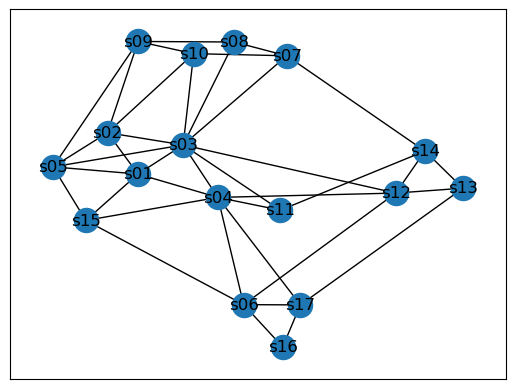

In [ ]:
nx.draw_networkx(G)

In [ ]:
plt.savefig('UndirectedGraph.png')

<Figure size 640x480 with 0 Axes>

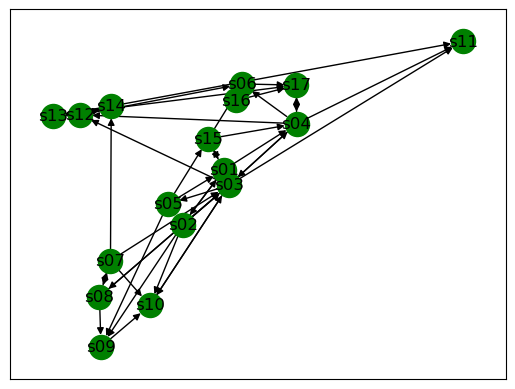

In [ ]:
nx.draw_networkx(G_directed, node_color='g')

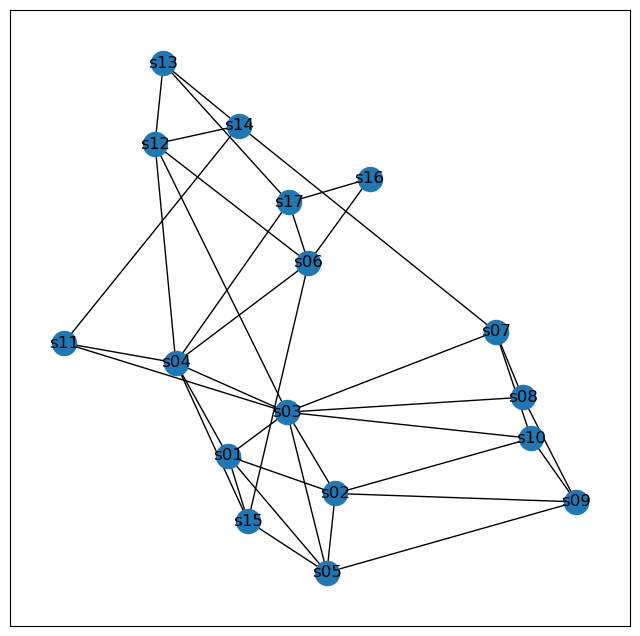

In [ ]:
#other way of plotting
plt.figure(figsize=(8,8))
nx.draw_networkx(G)
plt.show()

In [ ]:
G.degree('s03')

9

(array([1., 0., 3., 2., 7., 0., 0., 0., 1., 3.]),
 array([24. , 29.3, 34.6, 39.9, 45.2, 50.5, 55.8, 61.1, 66.4, 71.7, 77. ]),
 <BarContainer object of 10 artists>)

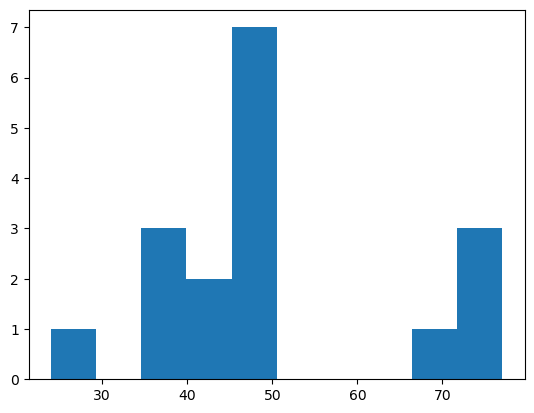

In [ ]:
#Degree plot for undirected and weighted graph
degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)

In [ ]:
#Degree centrality for unweighted graph
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'s01': 0.3125,
 's02': 0.3125,
 's03': 0.5625,
 's04': 0.4375,
 's11': 0.1875,
 's05': 0.3125,
 's15': 0.25,
 's06': 0.3125,
 's17': 0.25,
 's08': 0.1875,
 's09': 0.25,
 's16': 0.125,
 's10': 0.25,
 's07': 0.25,
 's12': 0.3125,
 's13': 0.1875,
 's14': 0.25}

In [ ]:
#Calculating degree centrality from scratch
n_nodes = len(G.nodes)
for node in G.nodes():
  print(node, G.degree(node)/(n_nodes-1))

s01 0.3125
s02 0.3125
s03 0.5625
s04 0.4375
s11 0.1875
s05 0.3125
s15 0.25
s06 0.3125
s17 0.25
s08 0.1875
s09 0.25
s16 0.125
s10 0.25
s07 0.25
s12 0.3125
s13 0.1875
s14 0.25


In [ ]:
#An example
G.degree('s03')/(17-1)

0.5625

In [ ]:
#Sort for identifying most inflential nodes using degree centrality
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

s03 0.5625
s04 0.4375
s01 0.3125
s02 0.3125
s05 0.3125
s06 0.3125
s12 0.3125
s15 0.25
s17 0.25
s09 0.25
s10 0.25
s07 0.25
s14 0.25
s11 0.1875
s08 0.1875
s13 0.1875
s16 0.125


In [ ]:
#Degree centrality for weighted graph
degree = G.degree(weight='weight')
max_degree = max(dict(degree).values())
degree_centrality_weighted = [deg/max_degree for deg in dict(degree).values()]
degree_centrality_weighted

[1.0,
 0.922077922077922,
 0.974025974025974,
 0.974025974025974,
 0.3116883116883117,
 0.5974025974025974,
 0.4805194805194805,
 0.6363636363636364,
 0.6103896103896104,
 0.4935064935064935,
 0.4675324675324675,
 0.5454545454545454,
 0.6363636363636364,
 0.6233766233766234,
 0.6363636363636364,
 0.5584415584415584,
 0.6233766233766234]

Closeness centrality¶
In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

In [ ]:
#Undirected and unweigted graph
closeness_centrality = nx.closeness_centrality(G)


In [ ]:
#Sort for identifying most inflential nodes using closeness_centrality
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
  print(node, closeness_centrality[node])

s03 0.6666666666666666
s04 0.6153846153846154
s12 0.5714285714285714
s01 0.5333333333333333
s11 0.5161290322580645
s05 0.5161290322580645
s06 0.5
s02 0.48484848484848486
s15 0.48484848484848486
s07 0.48484848484848486
s10 0.47058823529411764
s14 0.47058823529411764
s17 0.45714285714285713
s08 0.45714285714285713
s13 0.43243243243243246
s09 0.41025641025641024
s16 0.35555555555555557


In [ ]:
nx.closeness_centrality(G, distance='distance')

{'s01': 0.5333333333333333,
 's02': 0.48484848484848486,
 's03': 0.6666666666666666,
 's04': 0.6153846153846154,
 's11': 0.5161290322580645,
 's05': 0.5161290322580645,
 's15': 0.48484848484848486,
 's06': 0.5,
 's17': 0.45714285714285713,
 's08': 0.45714285714285713,
 's09': 0.41025641025641024,
 's16': 0.35555555555555557,
 's10': 0.47058823529411764,
 's07': 0.48484848484848486,
 's12': 0.5714285714285714,
 's13': 0.43243243243243246,
 's14': 0.47058823529411764}

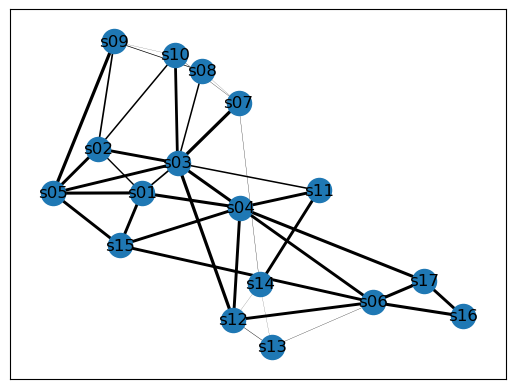

In [ ]:
nx.draw_networkx(G, width=edges['weight']/10)

Betweenness centrality¶
Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

Best connector/ Bridge

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
#Sort for identifying most inflential nodes using closeness_centrality
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
  print(node, betweenness_centrality[node])

s03 0.3404166666666667
s04 0.19566468253968253
s12 0.12271825396825396
s06 0.10018849206349206
s05 0.0654563492063492
s15 0.05621031746031746
s17 0.05293650793650794
s07 0.050277777777777775
s14 0.04916666666666667
s01 0.0391468253968254
s02 0.025992063492063493
s10 0.025843253968253963
s13 0.02111111111111111
s08 0.019593253968253968
s11 0.017916666666666664
s09 0.01736111111111111
s16 0.0


In [ ]:
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='weight')


In [ ]:
#Sort for identifying most inflential nodes using betweenness centrality
for node in sorted(betweenness_centrality_weighted, key=betweenness_centrality_weighted.get, reverse=True):
  print(node, betweenness_centrality_weighted[node])


s03 0.7583333333333333
s12 0.5
s05 0.3333333333333333
s04 0.325
s06 0.2916666666666667
s11 0.125
s17 0.125
s09 0.11666666666666667
s01 0.0
s02 0.0
s15 0.0
s08 0.0
s16 0.0
s10 0.0
s07 0.0
s13 0.0
s14 0.0


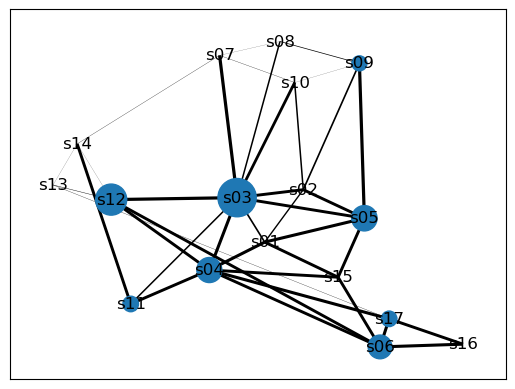

In [ ]:
#Plotted with edge with and node size
size = [val*1000 for val in nx.betweenness_centrality(G, weight='weight').values()]
nx.draw_networkx(G, width=edges['weight']/10, node_size=size)

In [ ]:
nx.betweenness_centrality(G, weight='weight', normalized=False)


{'s01': 0.0,
 's02': 0.0,
 's03': 91.0,
 's04': 39.0,
 's11': 15.0,
 's05': 40.0,
 's15': 0.0,
 's06': 35.0,
 's17': 15.0,
 's08': 0.0,
 's09': 14.0,
 's16': 0.0,
 's10': 0.0,
 's07': 0.0,
 's12': 60.0,
 's13': 0.0,
 's14': 0.0}

Eigenvector centrality¶
If a node is pointed to by many nodes (which also have high eigenvector centrality) then that node will have high eigenvector centrality.

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [ ]:
#Sort for identifying most inflential nodes using eigenvector centrality
for node in sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True):
  print(node, eigenvector_centrality[node])

s03 0.4485472979675353
s04 0.35283346117368625
s01 0.3191408683729161
s05 0.29255252705287443
s02 0.2910340882293079
s12 0.248809538829334
s15 0.2313025152818496
s10 0.22209545169996198
s06 0.20688820586442144
s07 0.19361886199342868
s09 0.1915922923064456
s11 0.18692750129523708
s08 0.16462950341222413
s14 0.14530038460965822
s17 0.1452821366686579
s13 0.1065065446362404
s16 0.06953859174549203


In [ ]:
eigenvector_centrality_weighted = nx.eigenvector_centrality(G, weight='weight')

In [ ]:
#Sort for identifying most inflential nodes using eigenvector centrality
for node in sorted(eigenvector_centrality_weighted, key=eigenvector_centrality_weighted.get, reverse=True):
  print(node, eigenvector_centrality_weighted[node])

s01 0.504484785192037
s03 0.48941680865822496
s02 0.4377416872008167
s04 0.41792843301033517
s05 0.22576426825954038
s15 0.1760246696194107
s11 0.15674270889274794
s10 0.09298081055260617
s08 0.06601584729182591
s07 0.06513178984509604
s09 0.05860216647376433
s17 0.057570524630574015
s12 0.05316711836334404
s06 0.05185417985225947
s16 0.03705681610008072
s14 0.03615009221997812
s13 0.031176520448309812


In [ ]:
#Eigenvector centrality for unweighted and directed graph
nx.eigenvector_centrality(G_directed)

{'s01': 0.2773170825083437,
 's02': 0.13847427862061307,
 's03': 0.41775926825782844,
 's04': 0.38154156333060585,
 's11': 0.306390251298658,
 's05': 0.13896529671829147,
 's15': 0.13847427862061307,
 's06': 0.31198807907880677,
 's17': 0.31344906422072144,
 's08': 0.15625535832806653,
 's09': 0.14426643396400213,
 's16': 0.10377990015762116,
 's10': 0.2503078024377427,
 's07': 0.05197751511419699,
 's12': 0.31411333052374907,
 's13': 0.14499530796593255,
 's14': 0.1217772792430166}

In [ ]:
#Eigenvector centrality for weighted and directed graph
nx.eigenvector_centrality(G_directed, weight='weight')

{'s01': 0.4231761108958662,
 's02': 0.12866651183030994,
 's03': 0.590353883526169,
 's04': 0.5349942616250454,
 's11': 0.29709333976829955,
 's05': 0.014132153765442915,
 's15': 0.20970796030691338,
 's06': 0.0513553213916974,
 's17': 0.06613729992654517,
 's08': 0.07688339120470367,
 's09': 0.02584231231049694,
 's16': 0.025817036918547538,
 's10': 0.07608535328256444,
 's07': 0.0386498600606086,
 's12': 0.088835295665698,
 's13': 0.07216873997419725,
 's14': 0.050487621655426904}